<a href="https://www.kaggle.com/code/tirendazacademy/eda-visualization-on-data-science-salaries?scriptVersionId=128407730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Science Trends & Salaries 💸 </div></b>

![](https://img.freepik.com/free-photo/business-proposal-purchase-hands-holding-money_53876-127124.jpg?w=1060&t=st=1682891340~exp=1682891940~hmac=cf32bec25907d203fd6ae13040bb6eee89d3c4b69a76fc568e51ec71b8bbe75d)

Hi guys 😀 In this notebook, we're going to explore trends & salaries in data science.

Table of contents:
<ul>
<li><a href="#importing">Importing required libraries </a></li>  
<li><a href="#loading">Loading the dataset </a></li>  
<li><a href="#understanding">Understanding the dataset</a></li>         
<li><a href="#job-titles">Top 10 job titles in 2023 </a></li>
<li><a href="#experience-levels">Experience levels</a></li>
<li><a href="#employment-types">Employment types</a></li>
<li><a href="#salary-job-title">Salaries by job titles</a></li>
<li><a href="#average">Salaries by employment types</a></li>
<li><a href="#salaries">Salaries by work years</a></li>
<li><a href="#remote">Remote jobs locations</a></li>         
<li><a href="#conclusion">Conclusion</a></li>   
</ul>

I'm excited, let's get started right away 🚀

<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Importing Required Libraries </div></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

!pip install country_converter -q
import country_converter as coco


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


<a id='loading'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Loading the Dataset </div></b>

In [3]:
df=pd.read_csv('Datasets/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


<a id='understanding'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Understanding the Dataset </div></b>

In [4]:
print("Number of rows and columns in the dataset:",df.shape)

Number of rows and columns in the dataset: (3755, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
print("Number of missing data in the dataset:",df.isnull().sum().sum())

Number of missing data in the dataset: 0


In [7]:
print("Number of unique values in columns:\n\n", df.nunique())

Number of unique values in columns:

 work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


<a id='job-titles'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Top 10 Job Titles in 2023 </div></b>

Let's see top 10 job titles in 2023 using the bar plot.

[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22')]

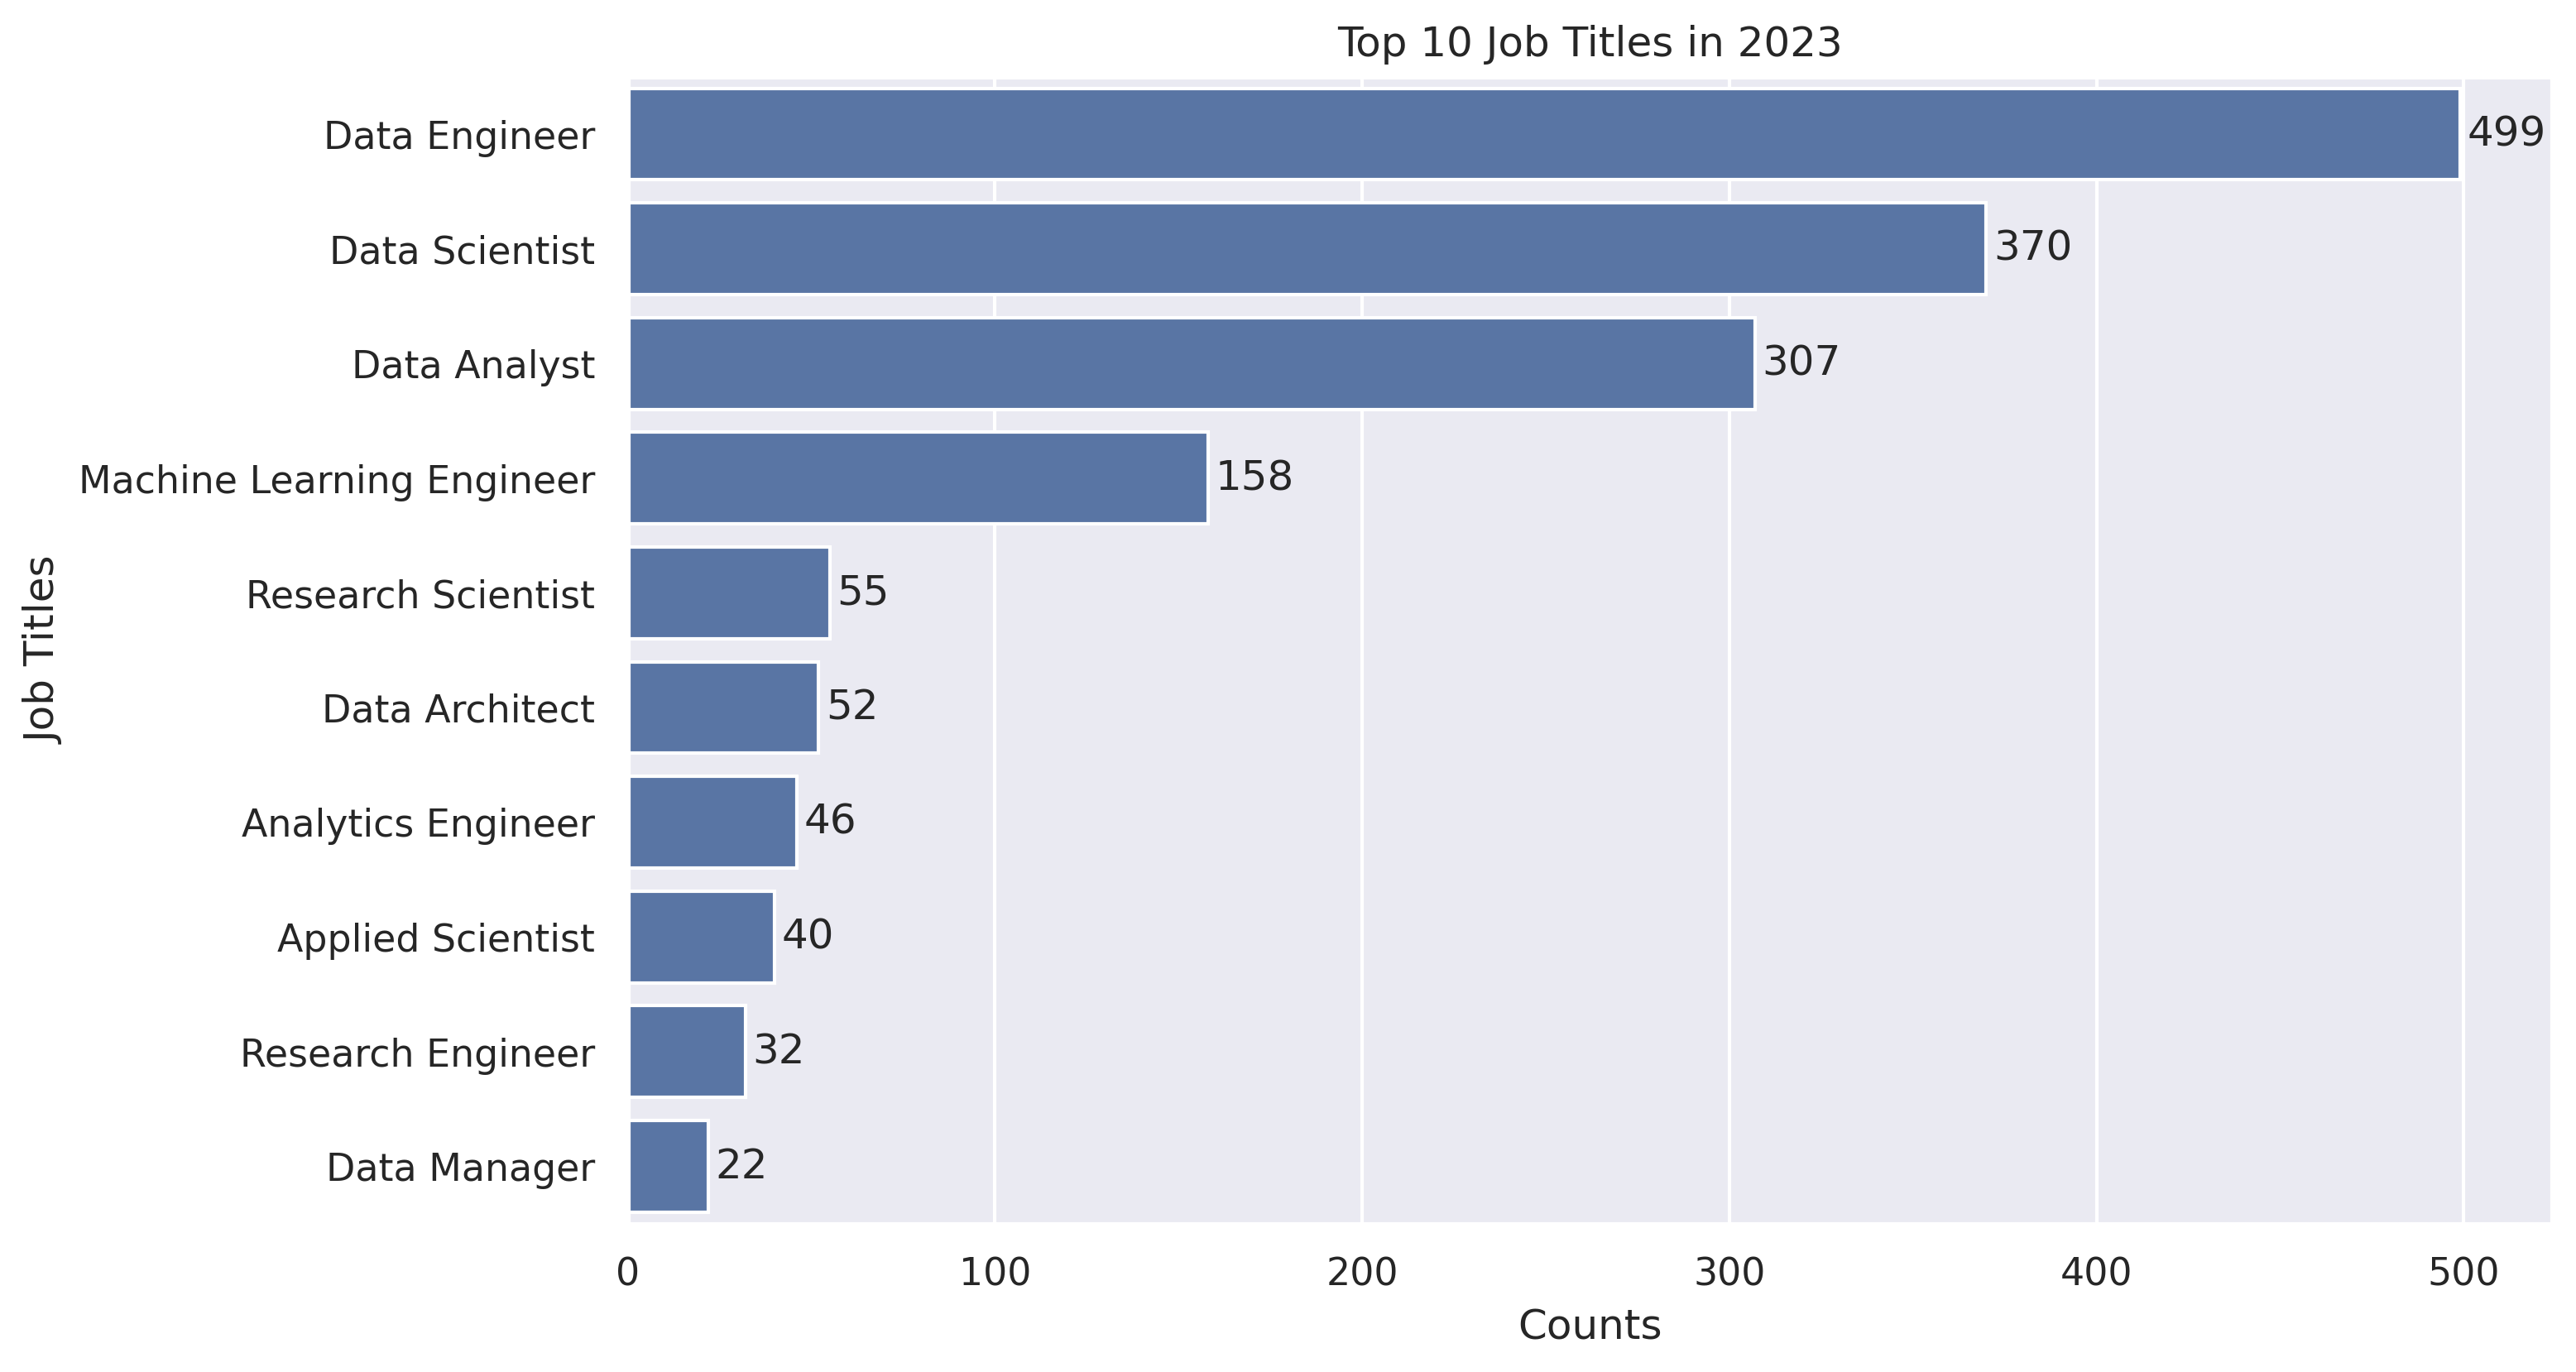

In [9]:
jobs = df[df['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
jobs.columns = ['job_title', 'count']
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=jobs, y='job_title', x='count')
ax.set(ylabel='Job Titles', xlabel='Counts', title='Top 10 Job Titles in 2023')
ax.bar_label(ax.containers[0], padding=2)

As you can see, there are the most data engineers, followed by data scientists.

<a id='experience-levels'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Experience Levels</div></b>

First, let's look at the unique values in the `experience_level` column.

In [10]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)


As you can see, there are 4 unique values which are SE(Senior level/expert) , MI(medium level/intermediate) , EN (Entry level) and EX(Executive level). Lets rename these values with the `rename` method.

In [11]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

Let's draw a bar plot of experience levels.

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

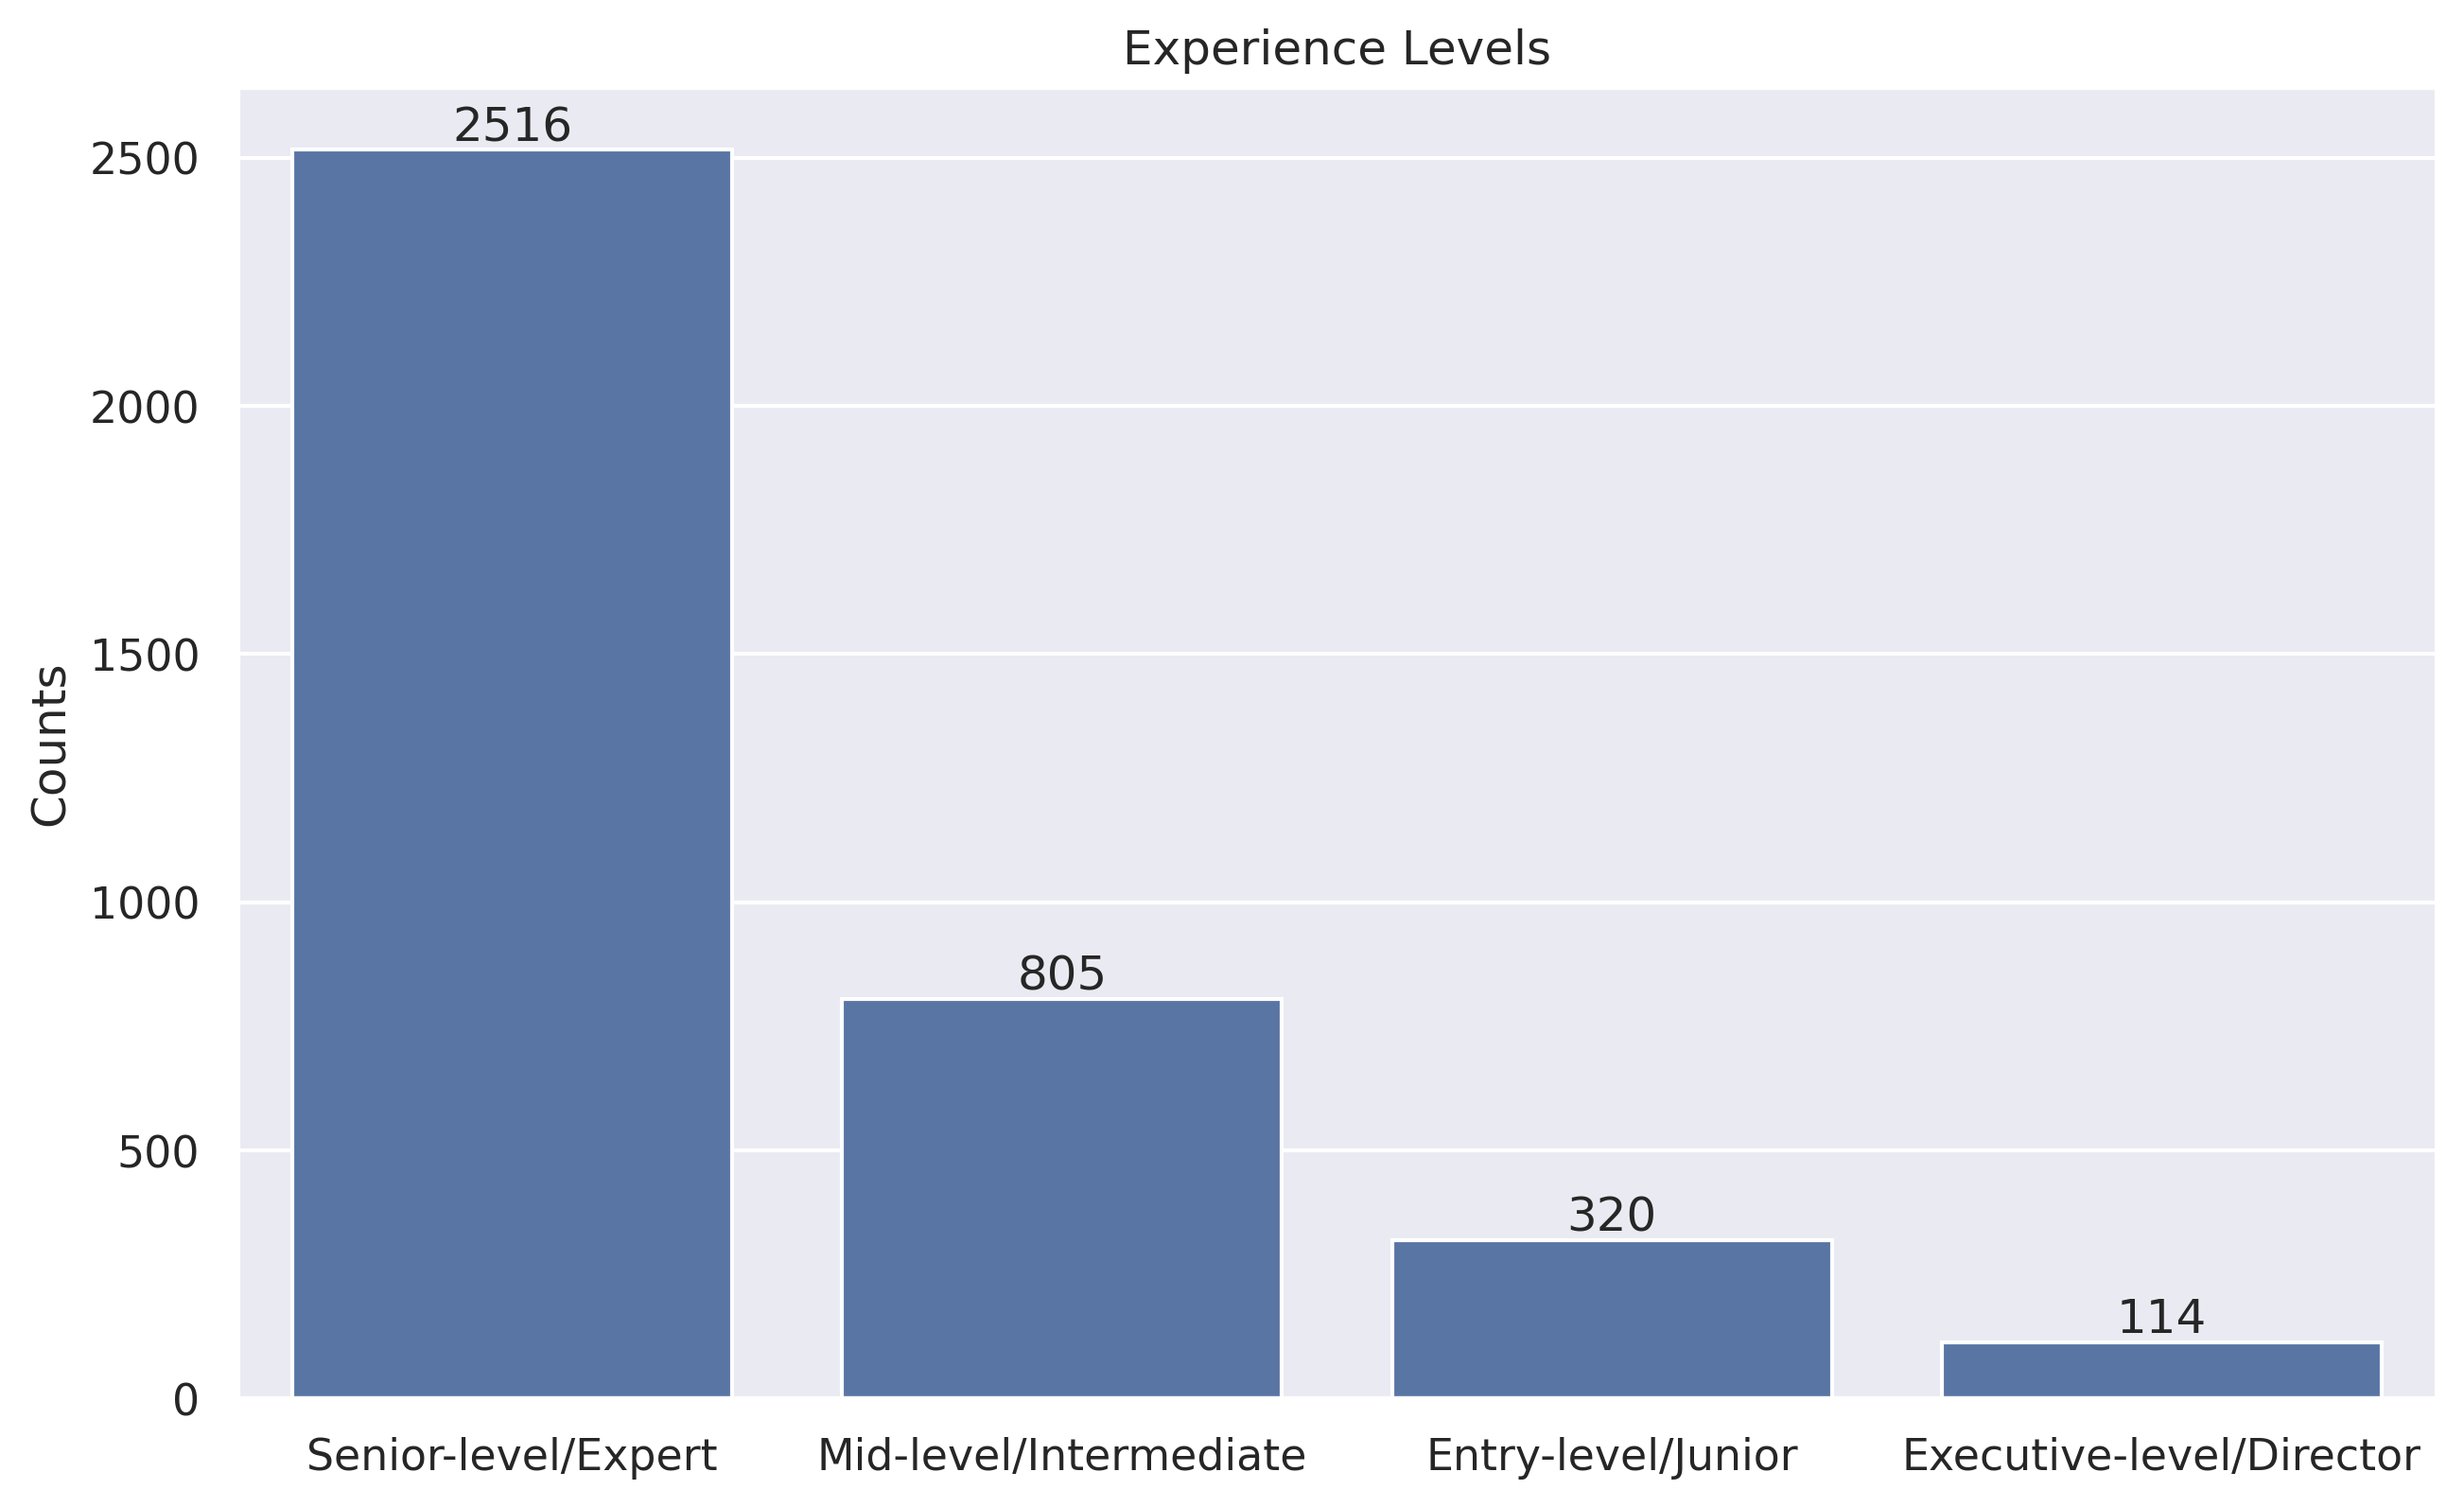

In [12]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.experience_level)
ax.set(xlabel='', ylabel='Counts', title='Experience Levels')
ax.bar_label(ax.containers[0])

As you can see, the senior-level positions have the highest count, followed by mid-level and junior positions. There are fewer director-level positions compared to other levels.

<a id='employment-types'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Employment Types</div></b>

Now, let's look at the unique values in the employment_type column.

In [13]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

As you can see, there are 4 unique values which are FT(Full-Time), PT(Part-Time), CT(Contract) and FL(Freelance). Lets rename these values with the rename method.

In [14]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

Let's draw a bar plot of experience types.

[Text(0, 0, '113'), Text(0, 0, '1')]

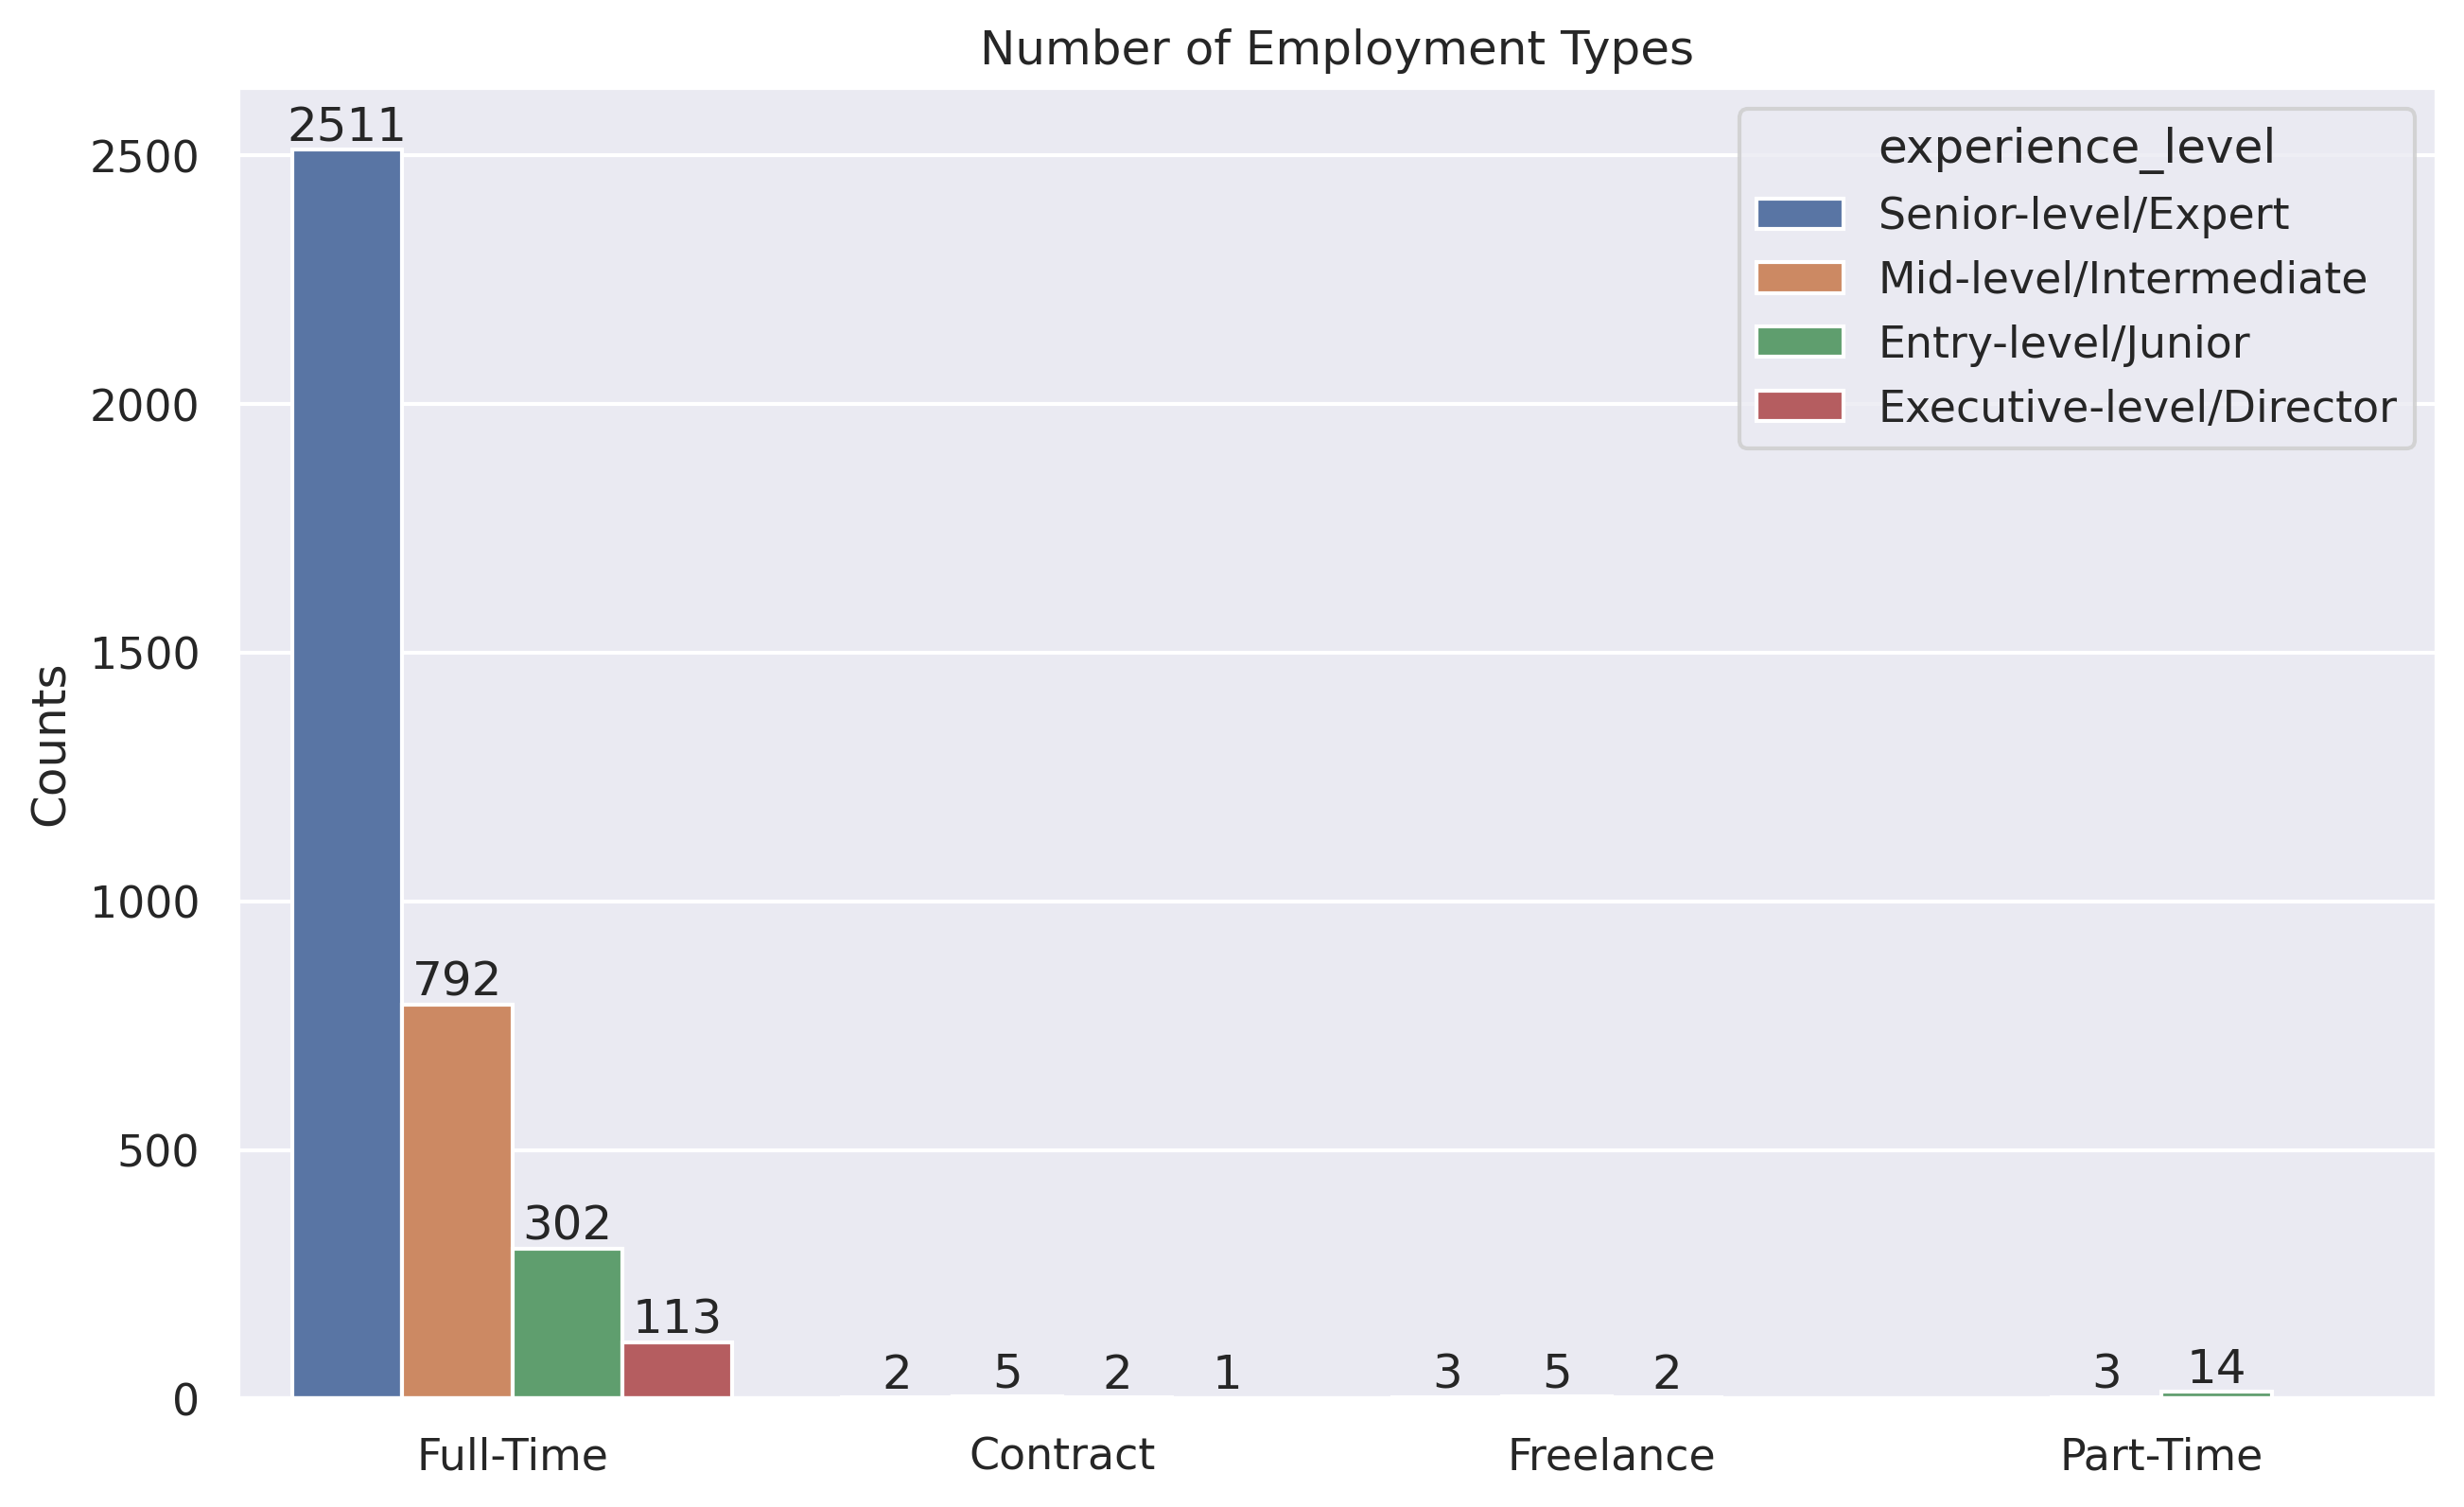

In [15]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')
ax.set(xlabel='', ylabel='Counts', title='Number of Employment Types')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

As you can see, a considerable number of people are employed here on a full-time basis. Among the full-time employees, the majority of them are senior. We observe that freelancing is less prevalent these days

<a id='salary-job-title'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Salaries by Job Titles</div></b>

[Text(2, 0, '375000'),
 Text(2, 0, '250000'),
 Text(2, 0, '212500'),
 Text(2, 0, '211254'),
 Text(2, 0, '198171'),
 Text(2, 0, '195141'),
 Text(2, 0, '192500'),
 Text(2, 0, '192420'),
 Text(2, 0, '191279'),
 Text(2, 0, '190264'),
 Text(2, 0, '190000'),
 Text(2, 0, '183858'),
 Text(2, 0, '175052'),
 Text(2, 0, '174150'),
 Text(2, 0, '163220')]

<Figure size 7500x2700 with 0 Axes>

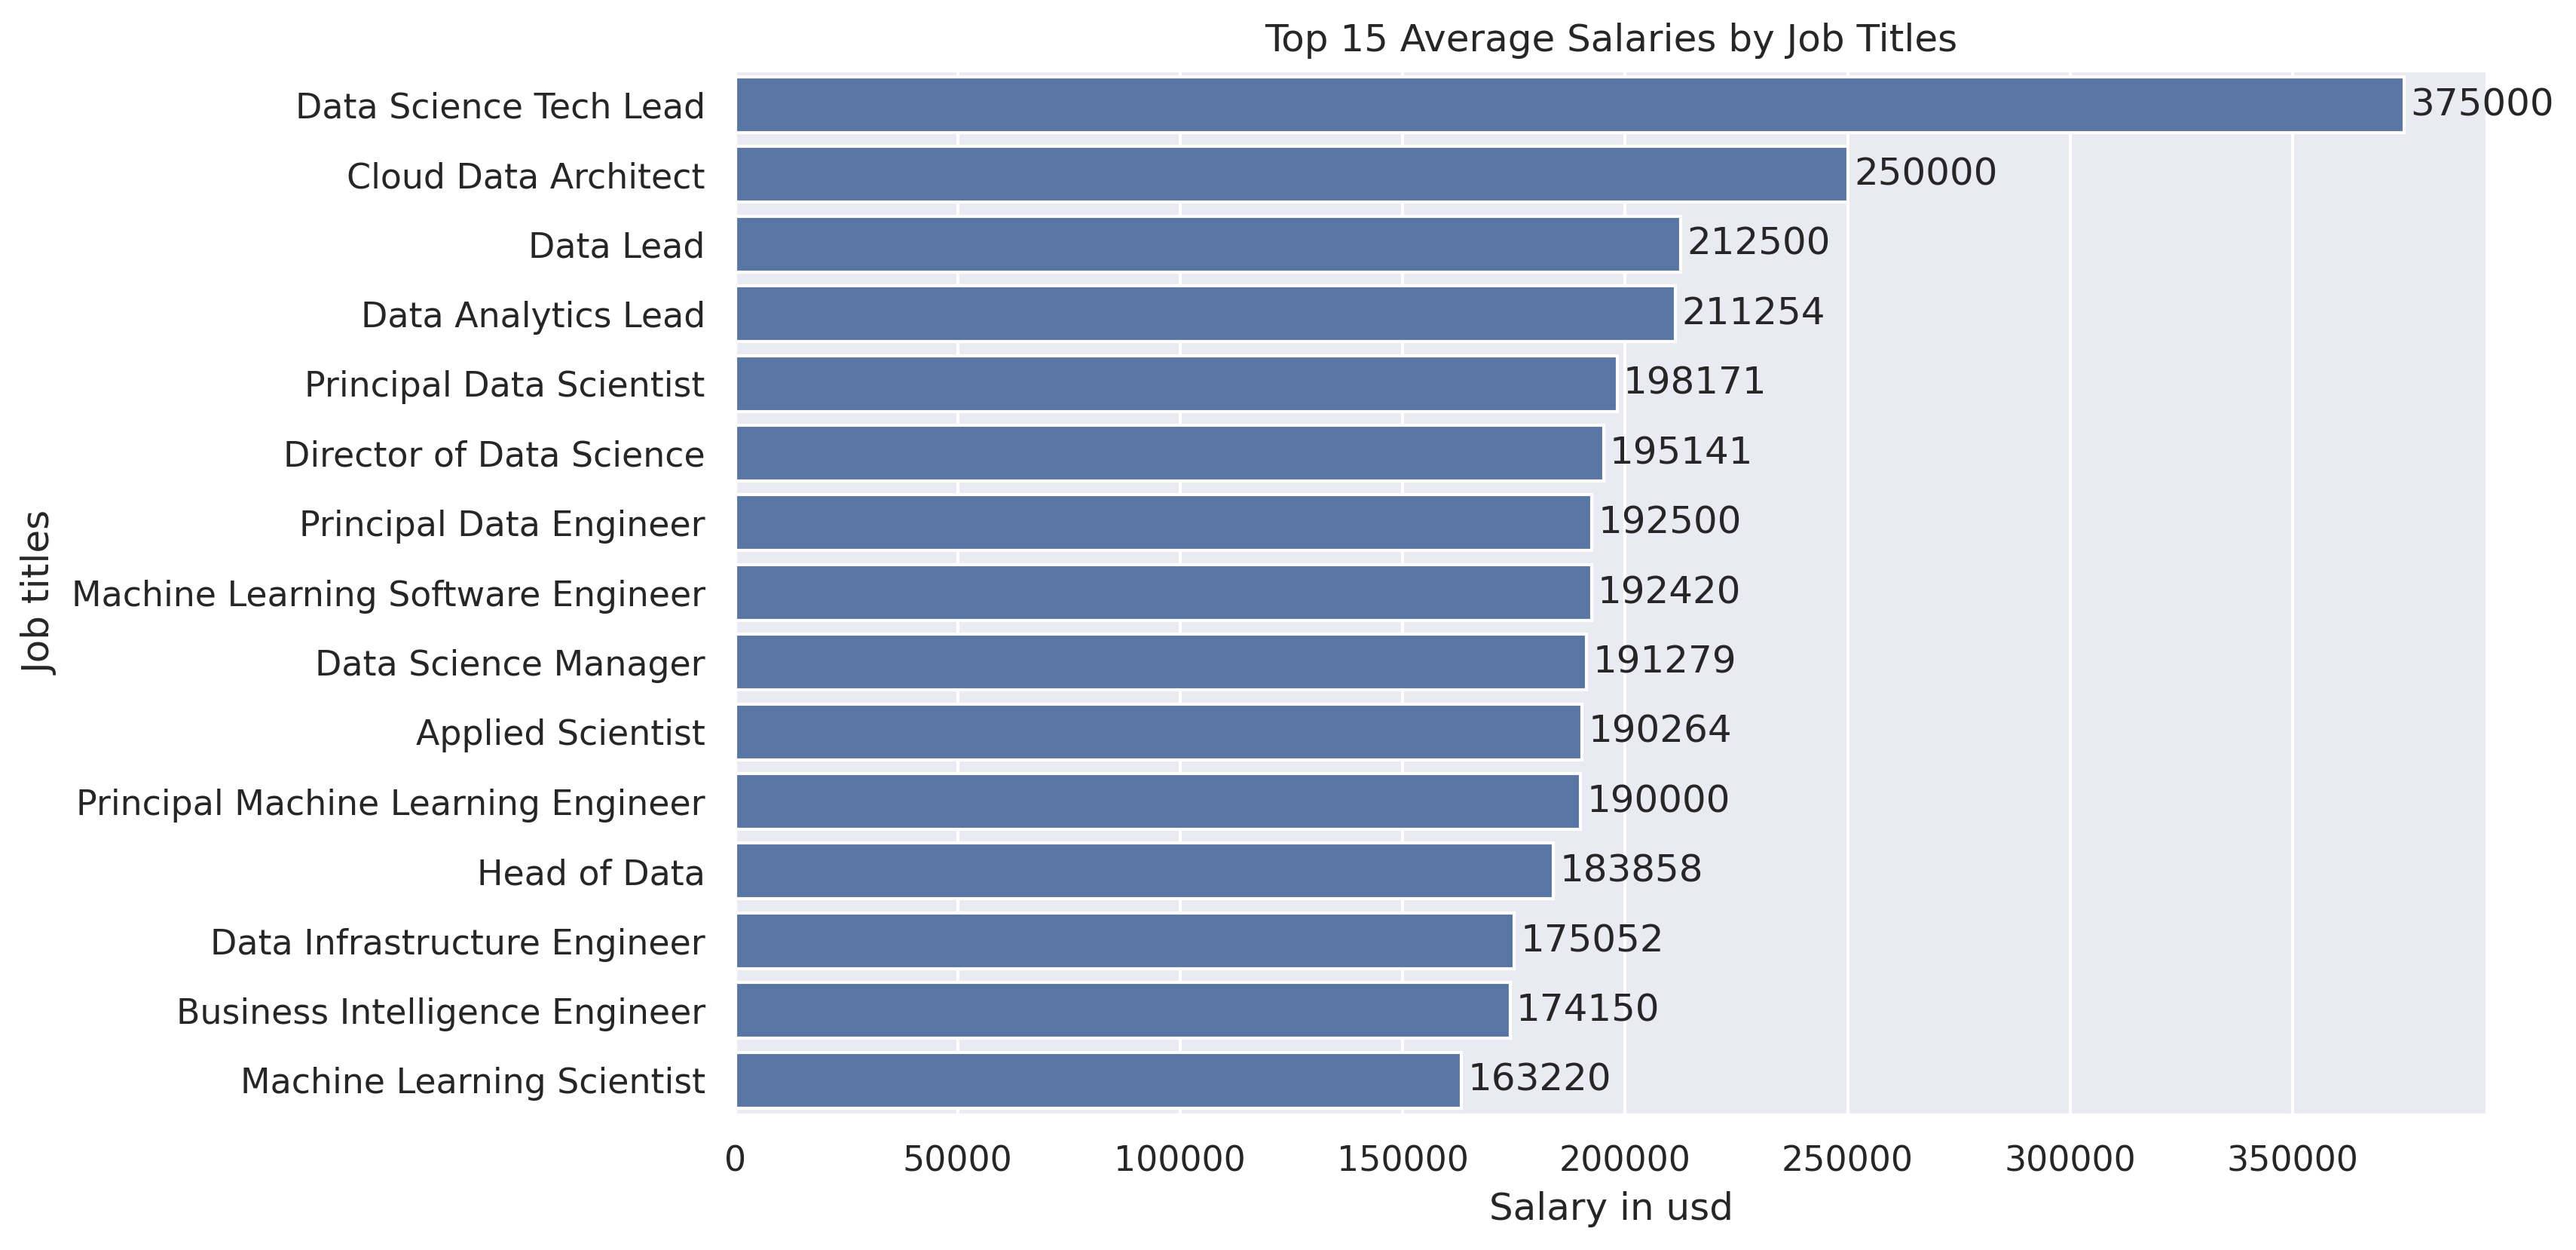

In [16]:
job_title_salary = df['salary_in_usd'].groupby(df['job_title']).mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles')
ax.bar_label(ax.containers[0], padding = 2)

As we expected, the average salaries of those generally employed at the executive level are higher. Due to the trend of cloud computing, cloud data architect is the second highest paid profession.

<a id='average'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Salaries by Employment Types</div></b>

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

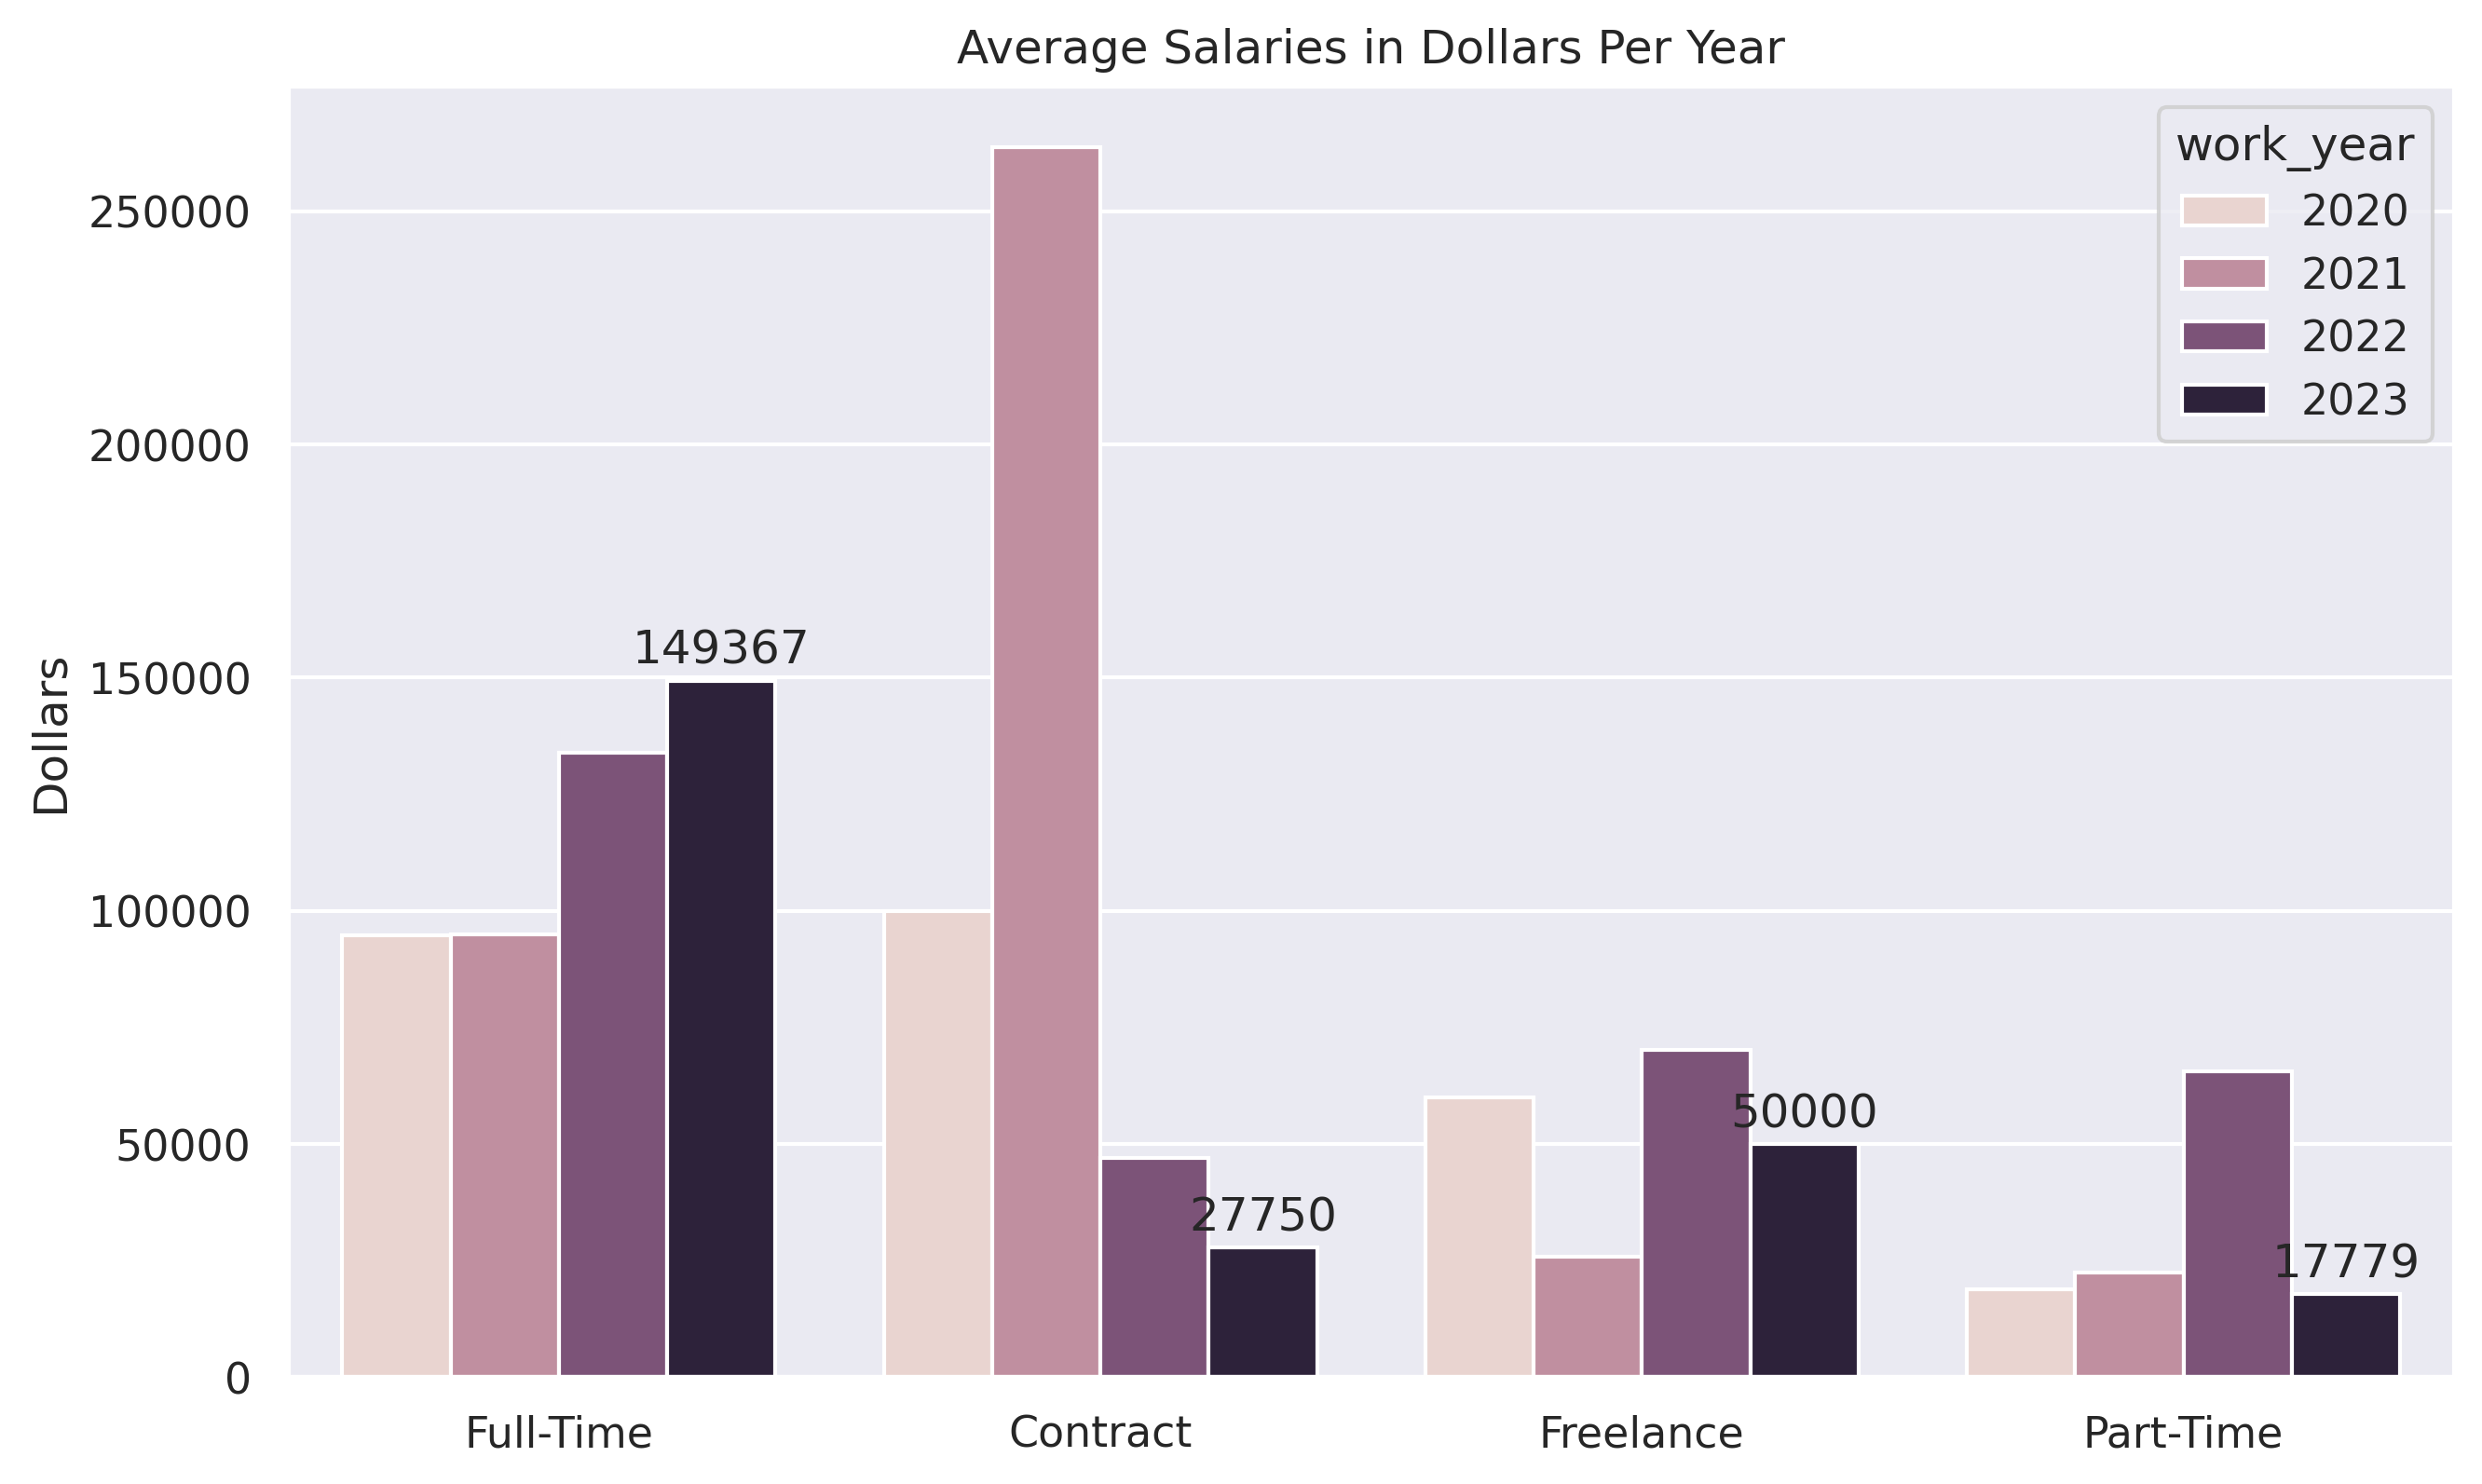

In [17]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

As you can see, average salaries for full-time have increased over the years. It shows that companies care about data science. The second-highest salaries on the plot belong to freelancers, which is a clear indication of the growing trend in freelance work.

<a id='salaries'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Salaries by Work Years</div></b>

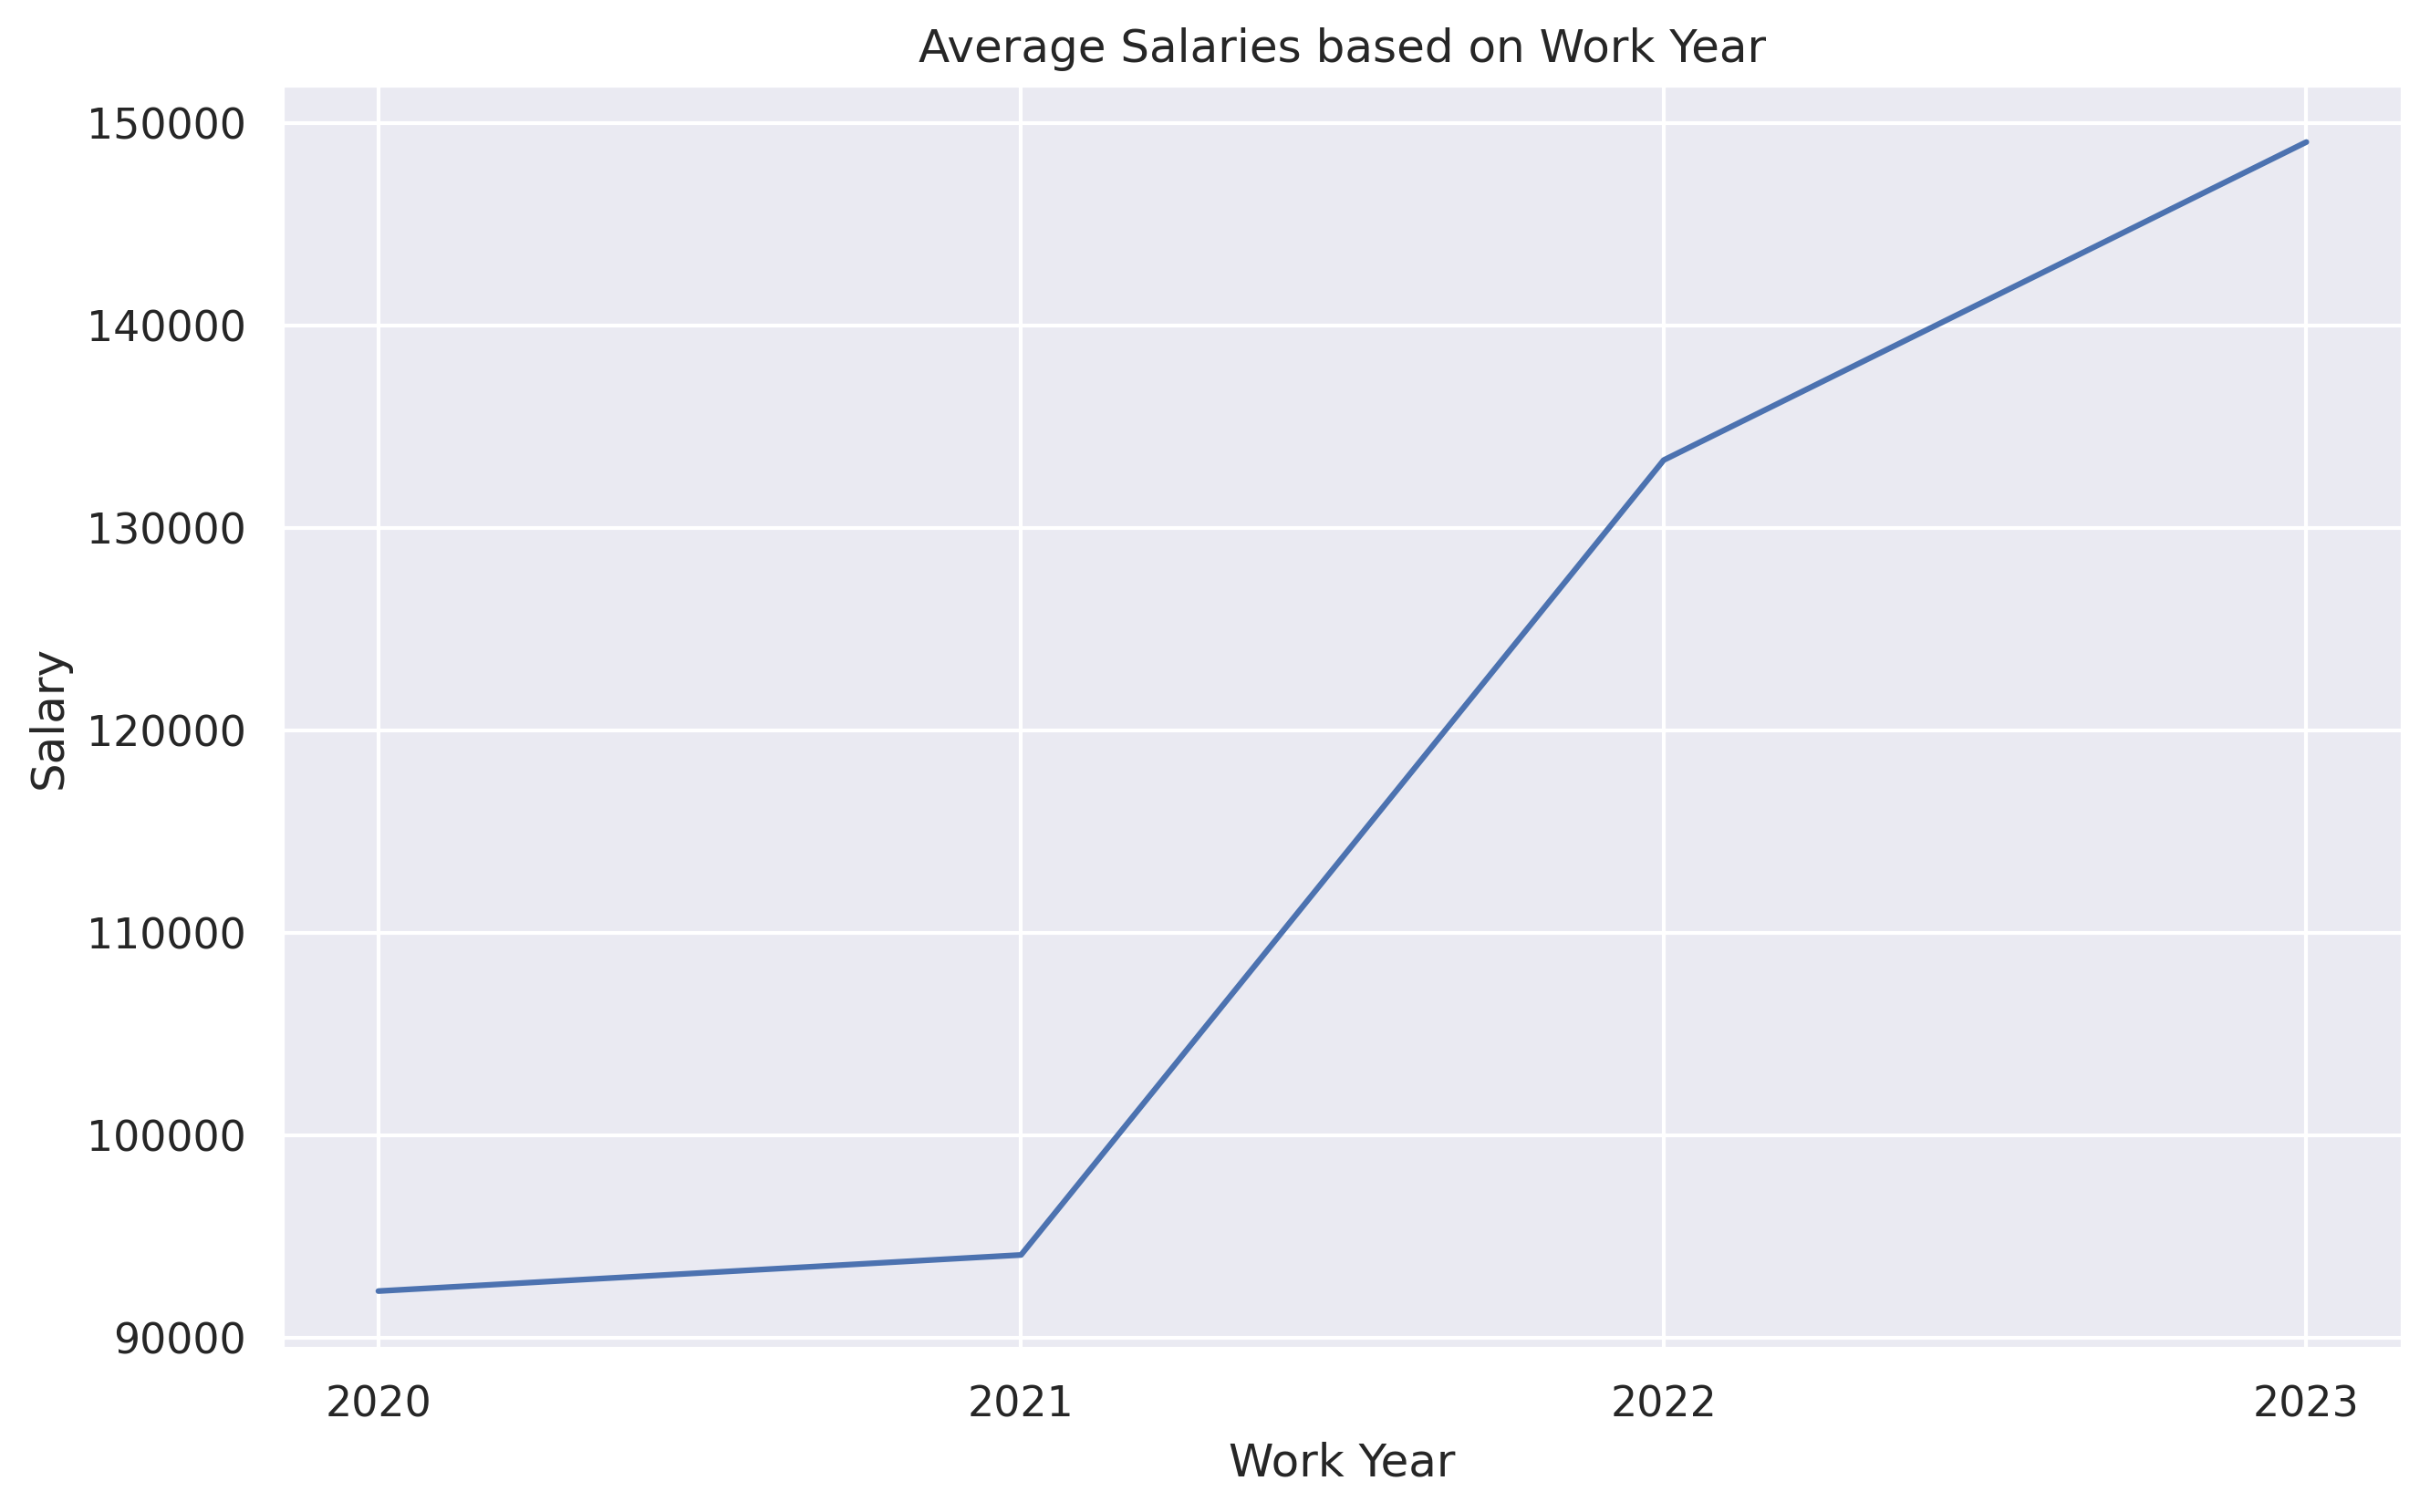

In [18]:
year_based_salary=df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

As you can see, the average salary for data-driven jobs is increasing every year, with a particularly significant jump observed between 2021 and 2022. This trend underscores the growing demand for skilled professionals in this field.

<a id='remote'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Remote Jobs Locations</div></b>

In [19]:
rr = df.groupby('company_location')['remote_ratio'].mean().reset_index()
rr['company_location'] =  coco.convert(names = rr['company_location'], to = "ISO3")
rr.head()

,company_location,remote_ratio
0,ARE,66.666667
1,ALB,50.000000
2,ARM,0.000000
3,ARG,100.000000
4,ASM,66.666667


In [20]:
fig = px.choropleth(rr,
                    locations = rr.company_location, 
                    color = rr.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs Locations")
fig.show()

<a id='conclusion'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Conclusion</div></b>

Data Science is one of the most in-demand and rapidly growing fields in the world. In this notebook, we covered the data science field salaries in detail. When we look the graphs, we can see that the popularity of data science continues. Thanks for taking the time! If you enjoyed it, please consider upvoting.


🔗 Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎